In [ ]:
!git clone https://github.com/henritomas/cs295-rl

Cloning into 'cs295-rl'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 65 (delta 22), reused 49 (delta 10), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
%cd /content/cs295-rl
!git pull

/content/cs295-rl
Already up to date.


In [ ]:
import sys
import os
if "./" not in sys.path:
  sys.path.append("./") 

import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import itertools
from collections import defaultdict
from lib import plotting
from tqdm import tqdm

matplotlib.style.use('ggplot')

In [ ]:
from lib.reinforcement_learning import q_learning_frozenlake, q_learning
from lib.reinforcement_learning import sarsa_frozenlake, sarsa
from lib.reinforcement_learning import cem_frozenlake, cem_cliffwalking, OneHotEncoding

from lib.envs import CliffWalkingEnv

## Comparisons on Deterministic FrozenLake
____

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=False)
Q, stats_q = q_learning_frozenlake(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.001, 
                                 e_decay=0.99, 
                                 alpha=0.5,
                                 gamma=1.0)

env = gym.make('FrozenLake-v0', is_slippery=False)
Q, stats_sarsa = sarsa_frozenlake(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.001, 
                                 e_decay=0.99, 
                                 alpha=0.5,
                                 gamma=1.0)

env = OneHotEncoding(gym.make('FrozenLake-v0', is_slippery=False))
stats_cem = cem_frozenlake(env,
                          lr=1e-3,
                          elite_ratio=0.3,
                          n_episodes=100,
                          n_epochs=250)

100%|██████████| 250/250 [00:45<00:00,  5.48it/s]


#### Q-Learning, SARSA (Decaying Epsilon)
- For Q-Learning and Sarsa, epsilon is set to decay by 0.99 each episode until 0.001 epsilon is reached. This lessens the amount of erroneous exploration when the agent has already learned the optimal path.

- Without this decay however, both Q-learning and SARSA can often make errors depending on how large the value of epsilon is. 

- Q-Learning and SARSA, with the same parameters, perform similarly on deterministic frozenlake (obtains stable 1.0 rewards at around 200-400 episodes).

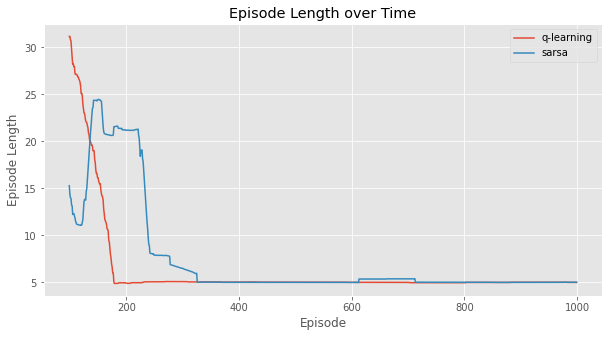

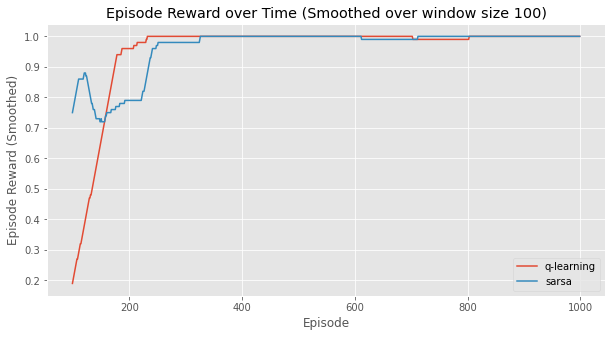

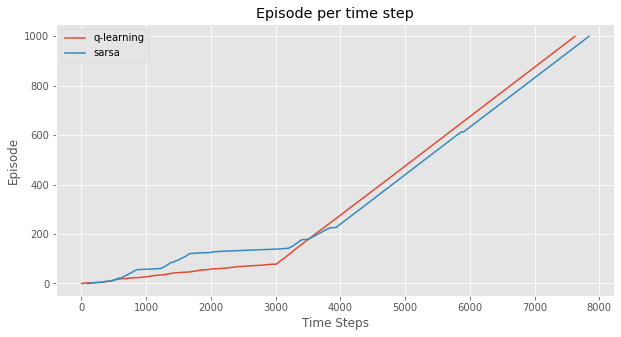

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats_multi([stats_q, stats_sarsa], smoothing_window=100, legend=['q-learning', 'sarsa'])

#### Q-Learning, SARSA (Constant Epsilon)


With constant epsilon, it is noticeable that SARSA is able to learn faster than Q-learning, but the performance when both algorithms converge is roughly the same - the difference being that SARSA takes a little more time to path around the holes in the lake, as observed in the slightly higher episode length compared to Q-learning.

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=False)
Q, stats_q = q_learning_frozenlake(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.1, 
                                 e_decay=1.0, 
                                 alpha=0.1,
                                 gamma=1.0)
Q, stats_sarsa = sarsa_frozenlake(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.1, 
                                 e_decay=1.0, 
                                 alpha=0.1,
                                 gamma=1.0)

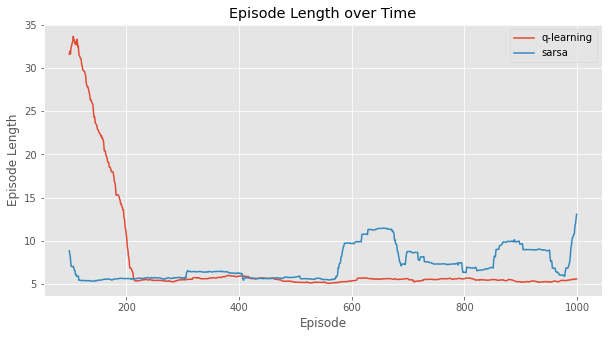

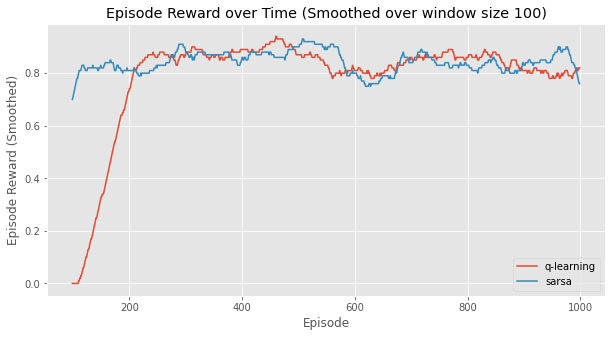

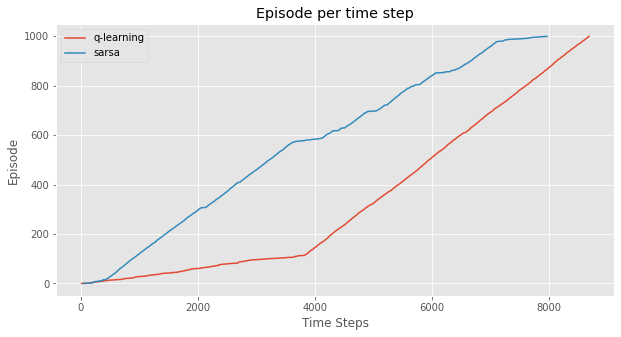

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [59]:
plotting.plot_episode_stats_multi([stats_q, stats_sarsa], smoothing_window=100, legend=['q-learning', 'sarsa'])

#### CEM

- For CEM, 100 episodes are run, and the top 30% 'elite' episodes are used to train the policy network. Compared to Q-learning and SARSA, CEM takes a whole lot more episodes to run (100 episodes per policy update) so it is much more costly to train. Its advantage is that since the policy is optimized, when the policy converges it is stable in the sense that it is unlikely for random exploration to occur (unlike egreedy policy).

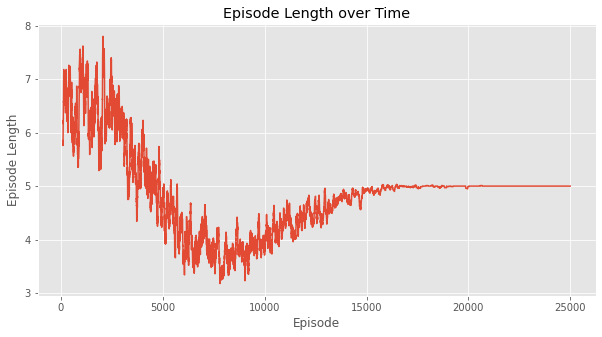

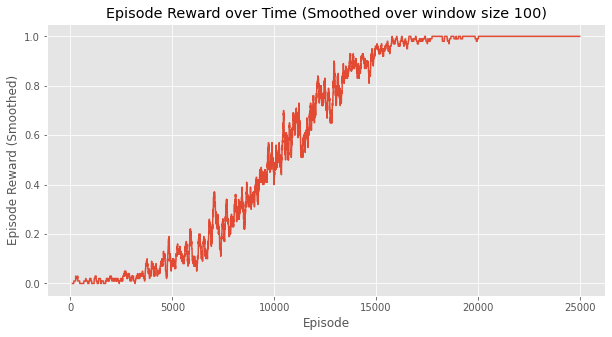

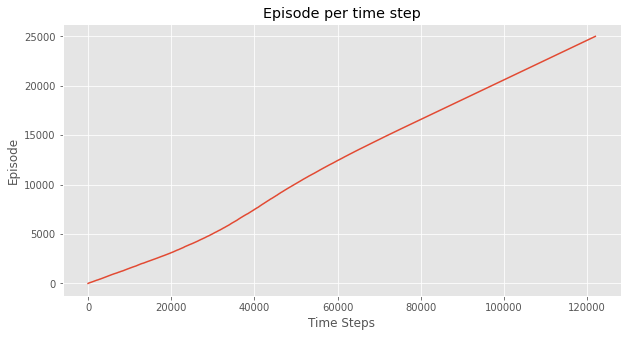

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats_cem, smoothing_window=100)

## Comparisons for Stochastic FrozenLake
____

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=True)
Q, stats_q = q_learning_frozenlake(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.001, 
                                 e_decay=0.99, 
                                 alpha=0.1,
                                 gamma=1.0)

env = gym.make('FrozenLake-v0', is_slippery=True)
Q, stats_sarsa = sarsa_frozenlake(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.001, 
                                 e_decay=0.99, 
                                 alpha=0.1,
                                 gamma=1.0)



100%|██████████| 1000/1000 [00:02<00:00, 447.33it/s]


In [ ]:
env = OneHotEncoding(gym.make('FrozenLake-v0', is_slippery=True))
stats_cem = cem_frozenlake(env,
                          lr=1e-3,
                          elite_ratio=0.3,
                          n_episodes=100,
                          n_epochs=250)

100%|██████████| 250/250 [00:44<00:00,  5.61it/s]


#### Q-Learning, SARSA
- Stochastic FrozenLake-v0 is considered solved if you are able to obtain a mean reward > 0.78 within a 100-episode window. In the reward graph below smoothed at 100-ep windows, it is clear that Q-Learning and SARSA are able to achieve this around the 600-800 episodes range. 

- A general observation I have made is that SARSA tends to perform/learn better in the earlier episodes in the stochastic version (compared to Q-Learning); this may be due to SARSA accounting for stochasticity of the egreedy policy in combination with the stochastic environment being too noisy, and it learns around the policy. 

- Q-Learning is sometimes able to catch up and solve FrozenLake at the later episodes. However, in most cases SARSA tends to be able to outperform Q-Learning in terms of general stability of obtaining mean rewards > 0.7. 

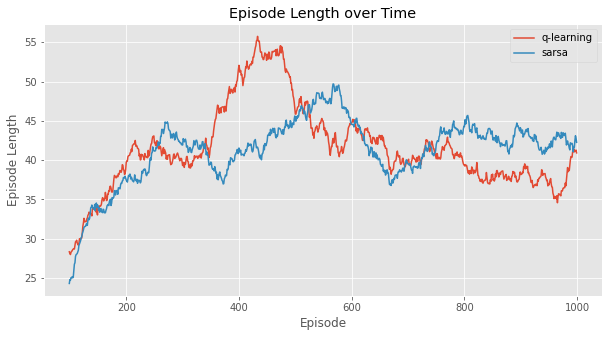

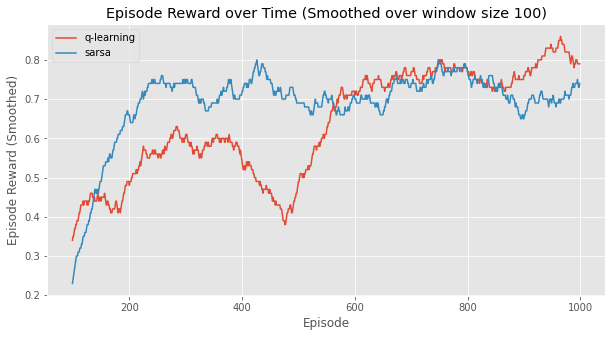

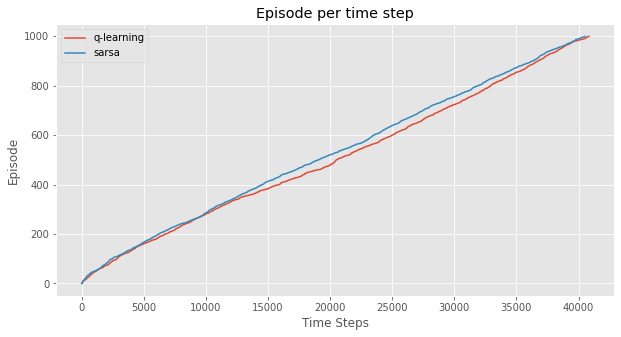

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats_multi([stats_q, stats_sarsa], smoothing_window=100, legend=['q-learning', 'sarsa'])

#### CEM

- In comparison, Cross Entropy Method performs very poorly on the stochastic version. 

- My hypothesis is its being reliant on a supervised form of training the policy; given the state, the ground truth action may be a false positive (action is wrong, positive reward due to slipping to correct action) or a false negative (action is correct, negative reward due to slipping to wrong action). 

- This results in an unsure state of whether the model really learns anything from the elite episodes when the state-action pairs are mostly false positives / false negatives. 

- We can see that the model may be improving slowly at snail pace, but is too inefficient in the use of episodes.

Possible solution

- One solution is to alter the reward function, or to edit the criteria of selecting elite/top episodes for training the policy.

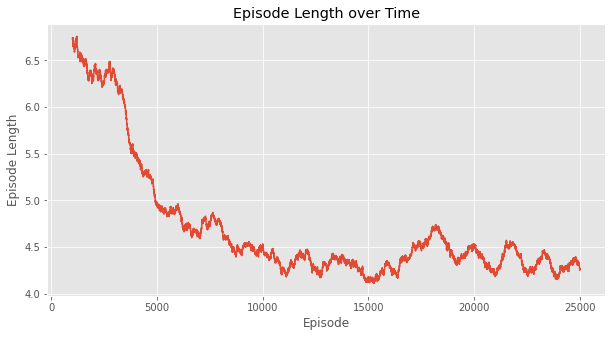

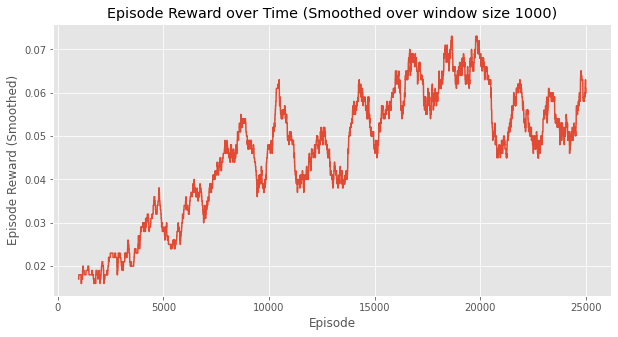

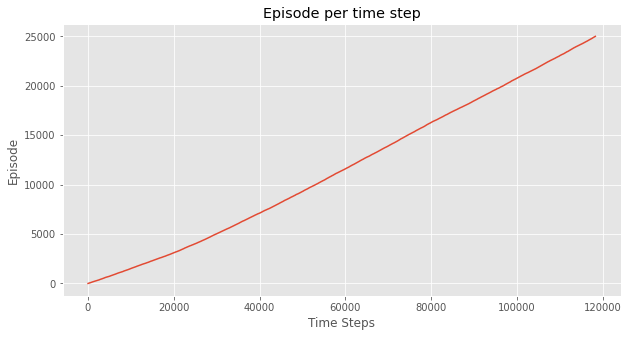

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats_cem, smoothing_window=1000)

## Comparisons on Cliff Walking (Constant Epsilon)
____



In [ ]:
env = CliffWalkingEnv(4,12)
Q, stats_q = q_learning(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.1, 
                                 e_decay=1.0, 
                                 alpha=0.5,
                                 gamma=1.0)

env = CliffWalkingEnv(4,12)
Q, stats_sarsa = sarsa(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.1, 
                                 e_decay=1.0, 
                                 alpha=0.5,
                                 gamma=1.0)

100%|██████████| 1000/1000 [00:01<00:00, 861.69it/s]


#### Q-Learning, SARSA

- As replicated in Sutton and Barto's book, Q-Learning converges at a mean reward around -45, while SARSA converges at a mean reward around -25. This is due to SARSA being **on-policy** - it takes into consideration that the egreedy policy has a constant epsilon chance of exploring into the cliff, and SARSA opts into learning the safer, less optimal path that avoids squares directly next to the cliff. 

- In contrast, Q-learning is off-policy; it doesnt take the policy into account while learning.  Q-learning converges on the optimal path of traversing right next to the cliff, but due to the constant epsilon chance of exploring it often gets punished when it explores into the cliff.

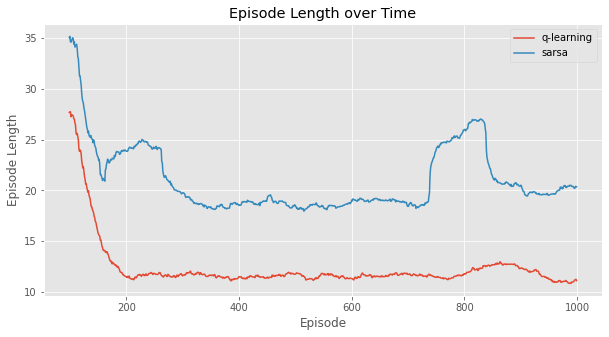

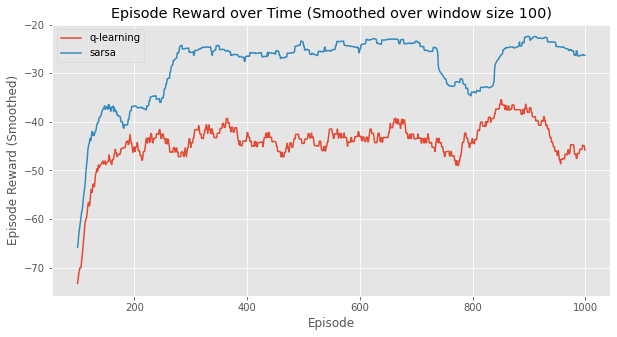

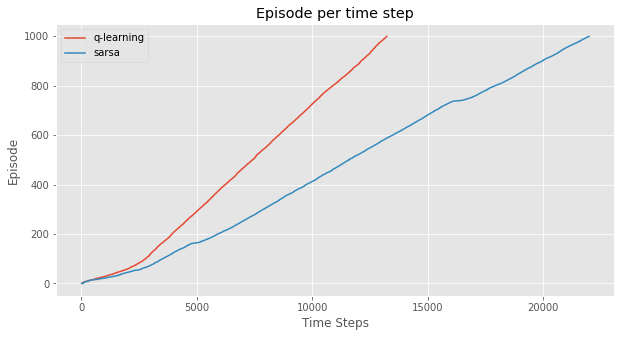

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats_multi([stats_q, stats_sarsa], smoothing_window=100, legend=['q-learning', 'sarsa'])

In [ ]:
env = CliffWalkingEnv(4,12)
stats_cem = cem_cliffwalking(env,
                          lr=1e-3,
                          elite_ratio=0.3,
                          n_episodes=100,
                          n_epochs=250)

100%|██████████| 250/250 [02:06<00:00,  1.97it/s]


 #### CEM
 
 - Similar to CEM's performance on Determinitic FrozenLake, CEM also converges on obtaining perfect rewards. In this case, CEM takes the two good qualities from both SARSA and Q-Learning - it learns the optimal path (-13 reward for shortest 13 actions toward the goal) but doesnt explore into the cliff (unlike the egreedy policy) so it doesnt need to path with the randomness in mind. 

- However, as with earlier results, CEM is very costly in the number of episodes it needs to run to be able to select elite episodes to train the policy network with. 

- Also, SARSA and Q-Learning's blunders when exploring into the cliff can be reduced by dependently decaying the value of epsilon after a target mean reward is reached. An advantage of CEM over this is you dont have to worry about adjusting the epsilon value yourself. 


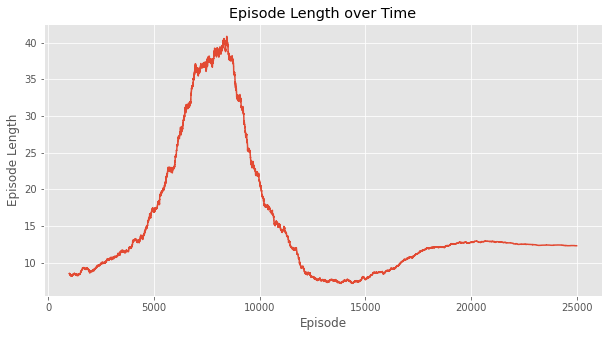

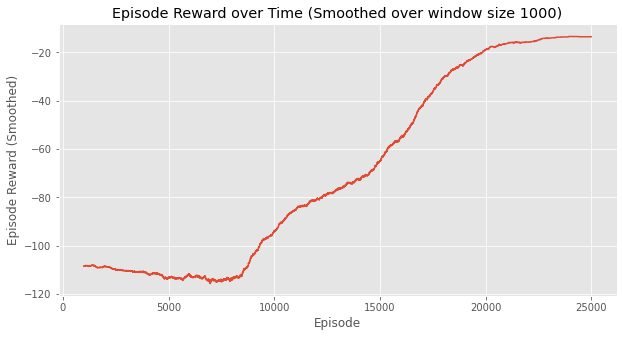

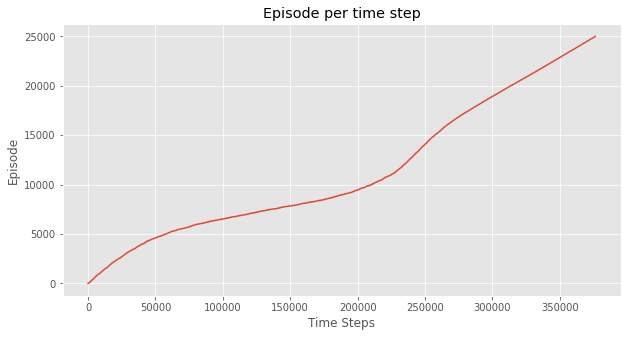

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats(stats_cem, smoothing_window=1000)

## Comparisons on Cliff Walking (Decaying Epsilon)
____

In [ ]:
env = CliffWalkingEnv(4,12)
Q, stats_q = q_learning(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.001, 
                                 e_decay=0.99, 
                                 alpha=0.5,
                                 gamma=1.0)

env = CliffWalkingEnv(4,12)
Q, stats_sarsa = sarsa(env, 
                                 n_episodes=1000, 
                                 e_initial=0.1, 
                                 e_final=0.001, 
                                 e_decay=0.99, 
                                 alpha=0.5,
                                 gamma=1.0)

100%|██████████| 1000/1000 [00:01<00:00, 876.42it/s]


#### Q-Learning vs SARSA

- with decaying epsilon til 0.001, we can see that SARSA's performance improves a bit due to the fact that it learns around the smaller epsilon and doesnt always path farthest from the cliff.

- we can also observe how SARSA has a more stable, constant performance after 400 episodes, compared to Q-learning which sometimes explores of the cliff and affecting its state-action values to the point of setting back its performance a bit (as seen around episode 400 and 800)

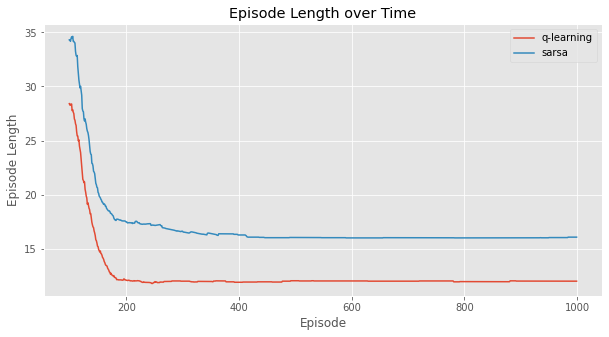

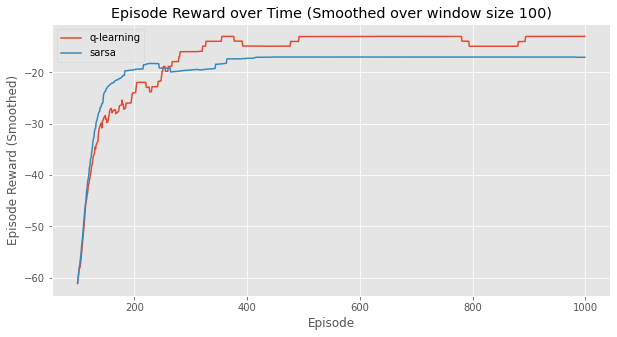

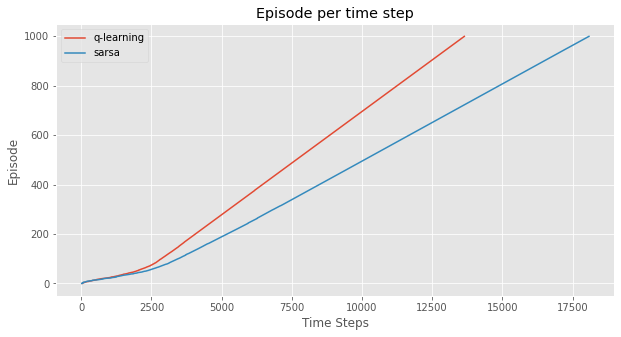

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plotting.plot_episode_stats_multi([stats_q, stats_sarsa], smoothing_window=100, legend=['q-learning', 'sarsa'])

## Varying Values of Epsilon, Alpha and Gamma
___

- **Alpha** : Learning rate of Q-Learning, SARSA, CEM

- **Gamma** : Discount factor of Q-Learning, SARSA on future rewards




#### Q-Learning & SARSA: Constant Alpha, Varying Gamma (Cliff Walking)

In [ ]:
env = CliffWalkingEnv(4,12)
gamma = [0.1, 0.5, 1.0]
stats_list = []

for g in gamma:
    Q, stats = q_learning(env, 
                                    n_episodes=1000, 
                                    e_initial=0.1, 
                                    e_final=0.1, 
                                    e_decay=1.0, 
                                    alpha=0.5,
                                    gamma=g)
    stats_list.append(stats)

for g in gamma:

    Q, stats = sarsa(env, 
                                    n_episodes=1000, 
                                    e_initial=0.1, 
                                    e_final=0.1, 
                                    e_decay=1.0, 
                                    alpha=0.5,
                                    gamma=g)
    stats_list.append(stats)

Observe in the graph below how q-learning at different values of gamma (discounted future rewards) does not affect its performance that much; it still converges on the optimal path to the goal. 

However, SARSA has problems learning with the lowered values of gamma as observed in the yellow and gray reward curves, which indicates that it is actually unable to learn/adapt. In contrast, SARSA with gamma=1.0 does as well as expected. 

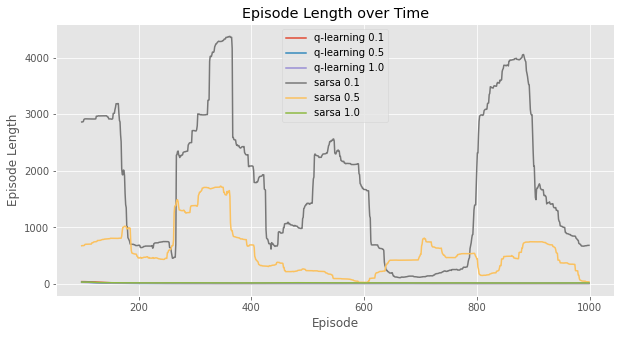

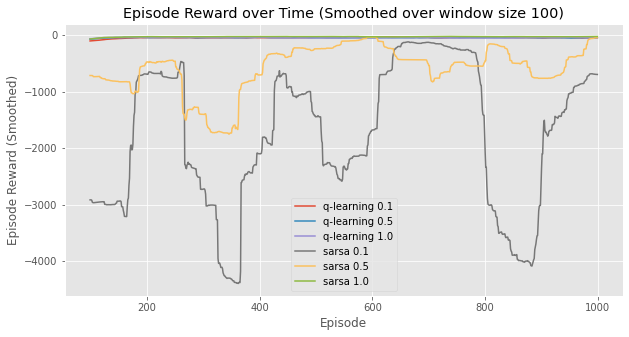

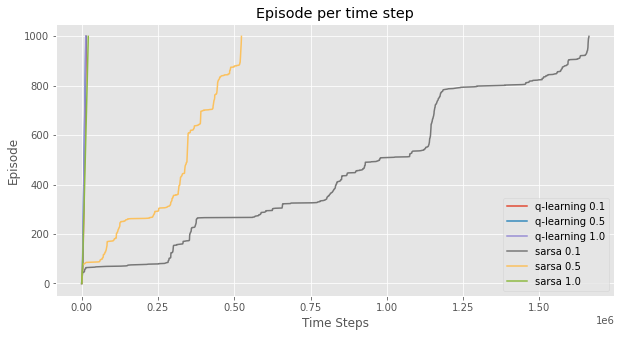

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [21]:
legend = ['q-learning 0.1',
          'q-learning 0.5',
          'q-learning 1.0',
          'sarsa 0.1',
          'sarsa 0.5',
          'sarsa 1.0',
          ]
plotting.plot_episode_stats_multi(stats_list, smoothing_window=100, legend=legend)

#### Q-Learning vs SARSA Varying Alpha, Constant Gamma (Cliff Walking)

In [ ]:
env = CliffWalkingEnv(4,12)
alpha = [0.1, 0.5, 1.0]
stats_list = []

for a in alpha:
    Q, stats = q_learning(env, 
                                    n_episodes=1000, 
                                    e_initial=0.1, 
                                    e_final=0.1, 
                                    e_decay=1.0, 
                                    alpha=a,
                                    gamma=1.0)
    stats_list.append(stats)

for a in alpha:

    Q, stats = sarsa(env, 
                                    n_episodes=1000, 
                                    e_initial=0.1, 
                                    e_final=0.1, 
                                    e_decay=1.0, 
                                    alpha=a,
                                    gamma=1.0)
    stats_list.append(stats)

Varying the alpha yields the expected outcome of higher alpha = algorithm learns faster in the earlier episodes (alpha of 0.1 is very slow to learn compared to the higher values) 

Interesting to note here is that SARSA seems to suddenly fail at 1.0 or the highest value of alpha, but works well with the lower values (0.1 and 0.5).

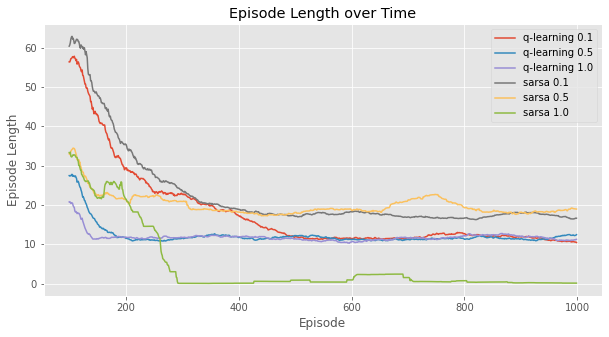

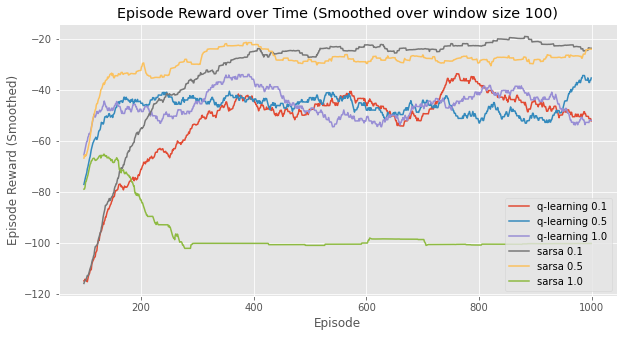

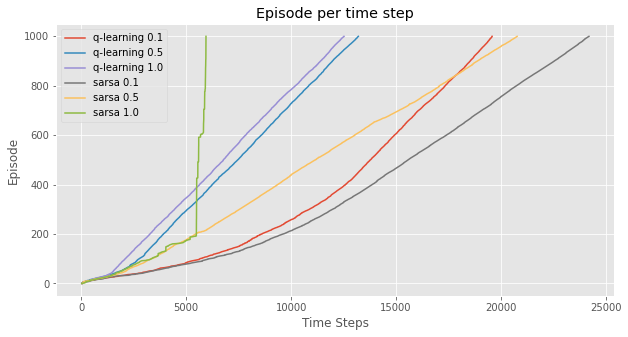

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [28]:
legend = ['q-learning 0.1',
          'q-learning 0.5',
          'q-learning 1.0',
          'sarsa 0.1',
          'sarsa 0.5',
          'sarsa 1.0',
          ]
plotting.plot_episode_stats_multi(stats_list, smoothing_window=100, legend=legend)

#### CEM for Varying Learning Rates, Constant Elite Ratio

Neural networks are often sensitive to learning rate, and adjusting lr can easily affect the final performance of the model on convergence. That said, since we have a small MLP, let us observe the effect:



In [ ]:
env = CliffWalkingEnv(4,12)

rates = [1e-3, 3e-4,1e-4]
stats_list = []

for lr in rates:

    stats_cem = cem_cliffwalking(env,
                            lr=lr,
                            elite_ratio=0.3,
                            n_episodes=100,
                            n_epochs=250)
    stats_list.append(stats_cem)

As observed, getting the learning rate correct is crucial for Cross Entropy Method, as too small lr will make learning too slow and not be able to escape local minimas, too large lr results in exploding gradient and not being able to update weights properly thereby not learning at all.

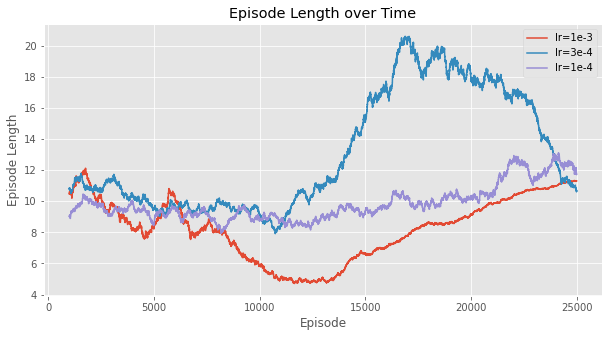

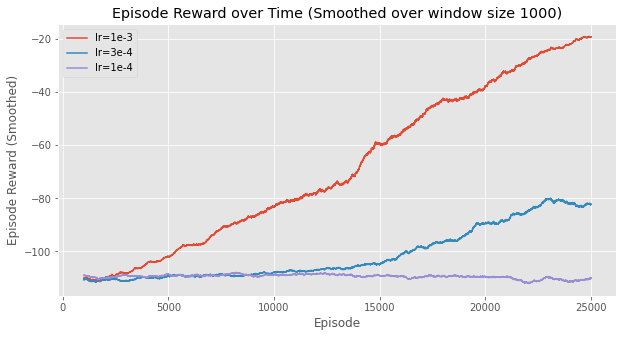

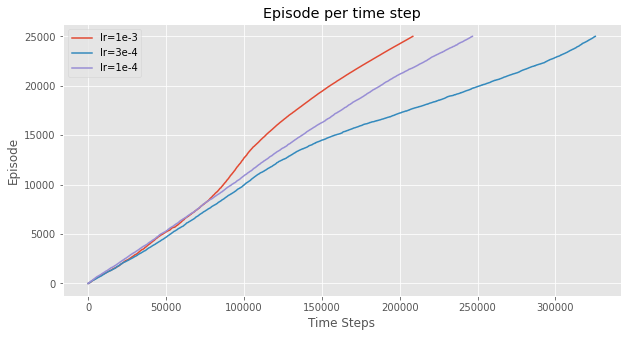

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [36]:
legend = [
          'lr=1e-3',
          'lr=3e-4',
          'lr=1e-4',
          ]
plotting.plot_episode_stats_multi(stats_list, smoothing_window=1000, legend=legend)

#### CEM for Constant LR, Varying Elite Ratio



In [ ]:
env = CliffWalkingEnv(4,12)

ratio = [0.1, 0.3, 0.5]
stats_list = []

for r in ratio:

    stats_cem = cem_cliffwalking(env,
                            lr=1e-3,
                            elite_ratio=r,
                            n_episodes=100,
                            n_epochs=250)
    stats_list.append(stats_cem)

Similar to the learning rate, picking the elite-episodes ratio also seems to be crucial for optimizing the learnign curve of the policy. Setting it too low means the model isn't learning much per epoch, while setting it too high lets in bad examples. 

Observe the graph below, and we can see that the default 30% elite episodes perform the best among the three in terms of getting optimal rewards the fastest. We can also see in the episode lengths graph that using 50% of the episodes results in bad examples causing a spike in length around 7000 episodes in. 

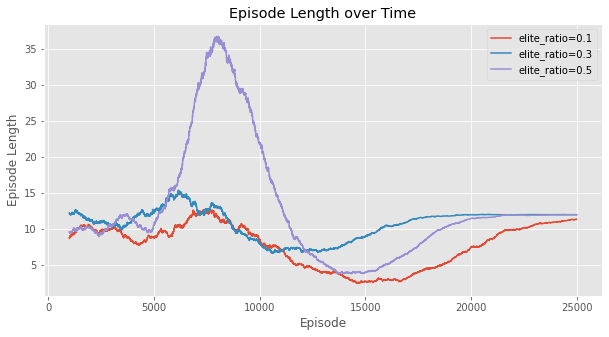

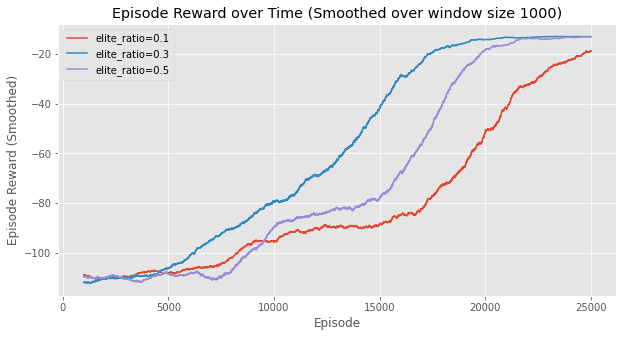

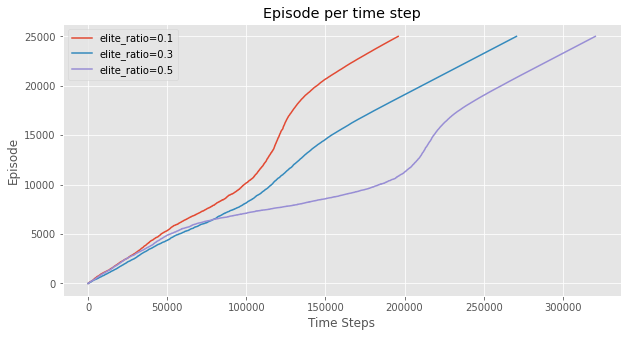

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [63]:
legend = [
          'elite_ratio=0.1',
          'elite_ratio=0.3',
          'elite_ratio=0.5',
          ]
plotting.plot_episode_stats_multi(stats_list, smoothing_window=1000, legend=legend)